# **פרויקט 3**
# **חלק א**

**שאלה 1**

שאלת המחקר: מהי ההשפעה של הפרמטרים: גיל, מין, עישון על רמת

bmi

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

**שאלה 2**

In [ ]:
df_full = pd.read_csv('framingham_heart_disease.csv')

In [ ]:
def sample_rows(df_full, size=200, seed=0):
    return df_full.sample(n=size,random_state=seed)

In [ ]:
df = sample_rows(df_full)
print(df)

      male  age  education  ...  heartRate  glucose  TenYearCHD
1669     0   47        1.0  ...       75.0     62.0           0
156      0   58        2.0  ...       60.0     73.0           0
87       0   61        2.0  ...       57.0     78.0           0
685      0   45        2.0  ...      100.0     75.0           0
666      0   57        1.0  ...       65.0     71.0           0
...    ...  ...        ...  ...        ...      ...         ...
1185     1   46        1.0  ...       75.0     77.0           0
3905     1   44        1.0  ...       80.0     64.0           0
3382     0   61        1.0  ...       80.0     90.0           0
465      1   38        2.0  ...       92.0     87.0           0
2249     0   56        3.0  ...       75.0     71.0           0

[200 rows x 16 columns]


**שאלה 3 א**

distribution for  male
0    106
1     94
Name: male, dtype: int64


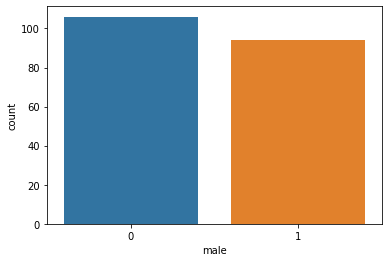

****************************
****************************
****************************
distribution for  currentSmoker
0    112
1     88
Name: currentSmoker, dtype: int64


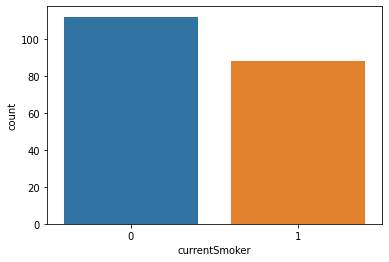

****************************
****************************
****************************


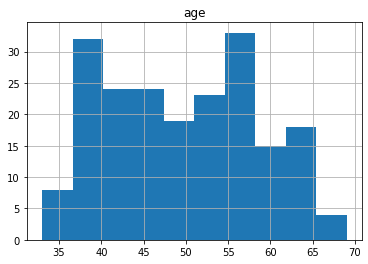

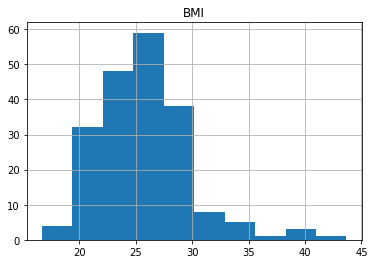


distribution for  age
0


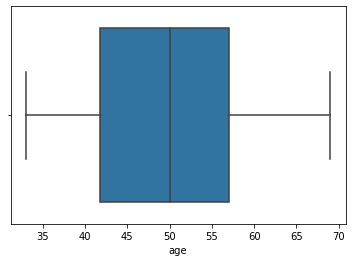

****************************
****************************
****************************
distribution for  BMI
1


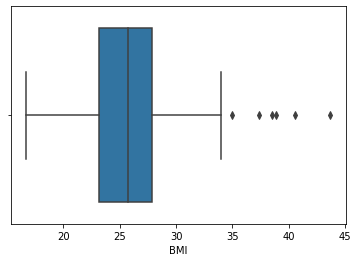

****************************
****************************
****************************


In [ ]:
discrete_vars = ["male", "currentSmoker"]
continius_vars = ["age", "BMI"]
for col in discrete_vars:
  print("distribution for ",col)
  info=df[col].value_counts()
  print(info)
  sns.countplot(x=df[col])
  plt.show()
  print("****************************")
  print("****************************")
  print("****************************")

for col in continius_vars:
  df[col].hist()
  plt.title(str(col))
  plt.show()
  print()

for col in continius_vars:
  print("distribution for ",col)
  print(df[col].isna().sum())
  sns.boxplot(x=df[col])
  plt.show()
  print("****************************")
  print("****************************")
  print("****************************")

**שאלה 3 ב**

התפלגות המשתנה המוסבר בי אם איי קרובה לסימטרית ונורמלית אך יש לה זנב ימני.
בהתפלגות של גיל נראה שיש בקצוות ערכים קבוהים ובמרכז ערכים נמוכים. קשה להסביר מאיזו התפלגות מגיע נתון זה.
לגבי נתונים חסרים - סיננו אותם בהמשך הקוד ורק שורה אחת לא הכילה את המידע על כל המדדים האלו.


In [ ]:
df.dropna(how='any', subset=['male','currentSmoker','BMI','age'], inplace=True)
#Only one has gone

In [ ]:
print(df)

      male  age  education  ...  heartRate  glucose  TenYearCHD
1669     0   47        1.0  ...       75.0     62.0           0
156      0   58        2.0  ...       60.0     73.0           0
87       0   61        2.0  ...       57.0     78.0           0
685      0   45        2.0  ...      100.0     75.0           0
666      0   57        1.0  ...       65.0     71.0           0
...    ...  ...        ...  ...        ...      ...         ...
1185     1   46        1.0  ...       75.0     77.0           0
3905     1   44        1.0  ...       80.0     64.0           0
3382     0   61        1.0  ...       80.0     90.0           0
465      1   38        2.0  ...       92.0     87.0           0
2249     0   56        3.0  ...       75.0     71.0           0

[199 rows x 16 columns]


**שאלה 3 ג**

In [ ]:
def plot_xy_func_continiuos(df, feature_list, predicted = 'BMI'):
  for i, feature in enumerate(feature_list):
    plt.figure(i)
    plt.scatter(df[feature], df[predicted])
    plt.title(feature)
    plt.show
    
    print()


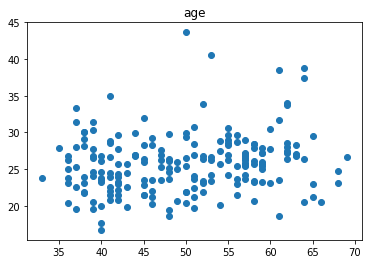

In [ ]:
feature_list = ['age']
plot_xy_func_continiuos(df, feature_list )

נראה במבט כללי שאין תלות בין הגיל לבין

bmi

**שאלה 3 ד**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'does not smoke-0 V.S smoke-1 ')

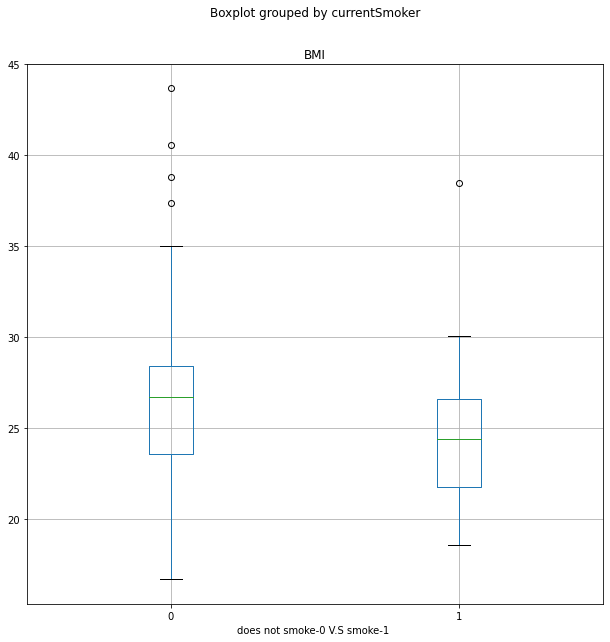

In [ ]:
boxplot = df[['currentSmoker','BMI']].boxplot(by='currentSmoker',figsize=(10,10))
boxplot.set_xlabel("does not smoke-0 V.S smoke-1 ")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0, 'Not male -0 V.S Male-1 ')

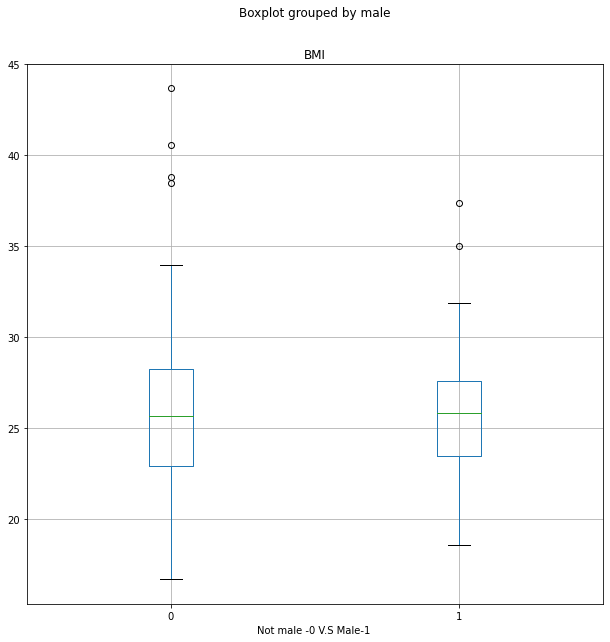

In [ ]:
boxplot = df[['male','BMI']].boxplot(by='male',figsize=(10,10))
boxplot.set_xlabel("Not male -0 V.S Male-1 ")

**שאלה 4**

In [ ]:
from sklearn.linear_model import LinearRegression
rows_count = len(df.index)
male = np.array(df['male'])
age = np.array(df['age'])
currentSmoker = np.array(df['currentSmoker'])

#create feature matrix X and BMI vector as Y
x = [[male[i], age[i], currentSmoker[i]] for i in range(rows_count)]
# print(x)
# print(len(x))
y = np.array(df['BMI'])

In [ ]:
model = LinearRegression().fit(x, y)

In [ ]:
r_sq = model.score(x, y)
# print('coefficient of determination:', r_sq)
print("BETA VALUES ARE:")
print('intercept:', model.intercept_)
print('slope:', model.coef_)
beta = [b for b in model.coef_]
beta = [model.intercept_, *beta]
print(beta)

BETA VALUES ARE:
intercept: 22.971323002720176
slope: [ 0.12178209  0.07366674 -2.09343752]
[22.971323002720176, 0.121782093514525, 0.07366673828010362, -2.093437515581179]


הסבר לתוצאה:

נסביר עבור המשתנה הרציף **גיל**. עליה של יחידה אחת (כלומר עליה של שנה אחת בגיל) תעלה את המדד בי אם איי ב0.07 יחידות.




**שאלה 5**

In [ ]:
def linear_predictor_y(x,beta):
  val = beta[0]
  for j in range(len(x)):
    val += x[j]*beta[j+1]
  return val
  

In [ ]:
def y_hat_calc(x, beta):
  y_hat_list = []
  for i in range(len(x)):
    y_hat_list.append(linear_predictor_y(x[i], beta))
  return y_hat_list



In [ ]:
y_hat = y_hat_calc(x, beta)

In [ ]:
def average_val(y_hat):
  return sum(y_hat)/len(y_hat)

In [ ]:
y_bar = average_val(y_hat)
y_real = y.tolist()
p = len(beta)
k = p-1

In [ ]:
def sum_diff_square(vec1, vec2):
  result = 0
  if type(vec2) == list:
    assert len(vec1)==len(vec2)
    for i in range(len(vec1)):
      result += (vec1[i] - vec2[i])**2
  else:
    for i in range(len(vec1)):
      result += (vec1[i] - vec2)**2
  return result

In [ ]:
n = len(y_real)
ssr = sum_diff_square(y_hat, y_bar)
sse = sum_diff_square(y_real, y_hat)
sst = sum_diff_square(y_real, y_bar)
msr = ssr/k
mse = sse/(n-p)
var_hat = sst/(n-1)
x_nump = np.array(x)


ANOVA

In [ ]:
print(f'SSR: {ssr:.2f}')
print(f'SSE: {sse:.2f}')
print(f'SST: {sst:.2f}')
print()
print(f'MSR: {msr:.2f}')
print(f'MSE: {mse:.2f}')
print(f'var hat: {var_hat:.2f}')



SSR: 323.90
SSE: 2933.40
SST: 3257.30

MSR: 107.97
MSE: 15.04
var hat: 16.45


F-TEST

In [ ]:
# T.S is f
alpha = 0.05
f_test_statistic = msr/mse
f_quantile = stats.f.ppf(1-alpha,dfn=p, dfd=n-p)


In [ ]:
def f_test(f_test_statistic, f_quantile):
  if f_test_statistic>f_quantile:
    return 'Reject'
  else:
    return 'Do Not Reject'

In [ ]:
f_test(f_test_statistic,f_quantile)

'Reject'

In [ ]:
r_square = ssr/sst
r_square_adj = 1- ((n-1)/(n-p))*(1-r_square)
print(f'R^2: {r_square:.2f}')
print(f'R^2_adj: {r_square_adj:.2f}')

R^2: 0.10
R^2_adj: 0.09


**שאלה 6**

In [ ]:
def conf_interval_t(estimator, se):
  alpha = 0.05
  diff = stats.t.ppf(1-alpha,df=n-p) *se
  return [estimator - diff, estimator + diff]

In [ ]:
def is_between(estimator, ci,str_print = "estimator"):
  if estimator>=ci[0] and estimator<=ci[1]:
    return f"------the {str_print} is between the confidence interval------"
  else:
      return f"******the {str_print} is NOT in the confidence interval******"


In [ ]:
x_np = np.array(x)
# print(np.shape(x_np))
ones_np = np.ones(n)
ones_np = np.reshape(ones_np, (199,1))
# print(np.shape(ones_np))
matrix_x = np.concatenate((ones_np,x_np),axis=1)
# matrix_x
xtx = matrix_x.T@matrix_x
sigma_epsilon_square = mse
features_names = ['intercept','male', 'age', 'current smoker']

c_matrix = np.linalg.inv(matrix_x.T @ matrix_x)


P=matrix_x.T@matrix_x
C = np.linalg.inv(P)
P = np.dot(matrix_x, C) # X(XTX)^-1
P = np.dot(P,matrix_x.T) #X(XTX)^-1 XT
I = np.identity(P.shape[1])
e = np.dot((I-P), y)


var_e_hat = sum([val**2 for val in e]) / n

std_0 = (C[0][0]*var_e_hat) ** 0.5
std_1 = (C[1][1]*var_e_hat) ** 0.5
std_2 = (C[2][2]*var_e_hat) ** 0.5
std_3 = (C[3][3]*var_e_hat) ** 0.5

ci_for200 = []

print("CI for set of sizee 200:")
for i in range(4):
  ci_for200.append(conf_interval_t(beta[i] ,(C[i][i]*var_e_hat) ** 0.5))
  print(f"CI for beta_{i}: {ci_for200[i]}")


CI for set of sizee 200:
CI for beta_0: [20.265298947432722, 25.67734705800763]
CI for beta_1: [-0.7935734091123807, 1.0371375961414306]
CI for beta_2: [0.022218610600848933, 0.1251148659593583]
CI for beta_3: [-3.017396976291058, -1.1694780548712997]


In [ ]:
#calculate model over all the data
df_full.dropna(how='any', subset=['male','currentSmoker','BMI','age'], inplace=True)
df_full

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [ ]:
from sklearn.linear_model import LinearRegression
rows_count = len(df_full.index)
male_full = np.array(df_full['male'])
age_full = np.array(df_full['age'])
currentSmoker_full = np.array(df_full['currentSmoker'])

#create feature matrix X and BMI vector as Y
x_full = [[male_full[i], age_full[i], currentSmoker_full[i]] for i in range(rows_count)]
# print(x)
# print(len(x))
y_full = np.array(df_full['BMI'])

In [ ]:
model_full = LinearRegression().fit(x_full, y_full)

In [ ]:
r_sq = model_full.score(x_full, y_full)
# print('coefficient of determination:', r_sq)
print("FULL MODEL - BETA VALUES ARE:")
print('intercept:', model_full.intercept_)
print('slope:', model_full.coef_)
beta_full = [b for b in model_full.coef_]
beta_full = [model_full.intercept_, *beta_full]
print(beta_full)

FULL MODEL - BETA VALUES ARE:
intercept: 23.632049602136647
slope: [ 0.97021387  0.04907851 -1.3752637 ]
[23.632049602136647, 0.9702138659731474, 0.049078505047878695, -1.3752636991394886]


In [ ]:
for i in range(len(beta_full)):
    print(f' Value of Beta{i} for the feature {features_names[i]} in the REAL WORLD is: {beta_full[i]}')
    print(f' Confidence Interval for Beta{i} in THE SAMPLE is: {ci_for200[i]}')
    print(is_between(beta_full[i], ci_for200[i],"value"))
    print()

 Value of Beta0 for the feature intercept in the REAL WORLD is: 23.632049602136647
 Confidence Interval for Beta0 in THE SAMPLE is: [20.265298947432722, 25.67734705800763]
------the value is between the confidence interval------

 Value of Beta1 for the feature male in the REAL WORLD is: 0.9702138659731474
 Confidence Interval for Beta1 in THE SAMPLE is: [-0.7935734091123807, 1.0371375961414306]
------the value is between the confidence interval------

 Value of Beta2 for the feature age in the REAL WORLD is: 0.049078505047878695
 Confidence Interval for Beta2 in THE SAMPLE is: [0.022218610600848933, 0.1251148659593583]
------the value is between the confidence interval------

 Value of Beta3 for the feature current smoker in the REAL WORLD is: -1.3752636991394886
 Confidence Interval for Beta3 in THE SAMPLE is: [-3.017396976291058, -1.1694780548712997]
------the value is between the confidence interval------



שאלה 7

In [ ]:
n_full = len(y_full)
y_hat_full = y_hat_calc(x_full, beta_full)
y_bar_full = average_val(y_hat_full)
y_real_full = y_full.tolist()
ssr_full = sum_diff_square(y_hat_full, y_bar_full)
sse_full = sum_diff_square(y_real_full, y_hat_full)
sst_full = sum_diff_square(y_real_full, y_bar_full)
msr_full = ssr_full/k
mse_full = sse_full/(n_full-p)
var_hat_full = sst/(n_full-1)


In [ ]:
# T.S is f
alpha = 0.05
f_test_statistic_full = msr_full/mse_full
f_quantile_full = stats.f.ppf(1-alpha,dfn=p, dfd=n_full-p)
f_test(f_test_statistic_full,f_quantile_full )

'Reject'

המקדמים אינם 0

שאלה 8

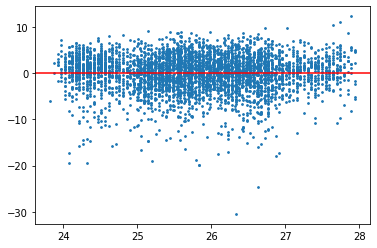

In [ ]:
ei = [y_hat_full[i] - y_real_full[i] for i in range(n_full)]
plt.scatter(y_hat_full, ei, s=3)
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


מסקנות מגרף השאריות: המודל נראה לינארי ובעל שונות קבועה.
 יש מעט ברחנים שהם חריגים אך השאריות מפוזרות באופן די אחיד על פני הגרף.
 סביר שהתפלגות הרעש היא נורמלית

שאלה 9

In [ ]:
duplicate_df = df_full.copy() #4219
# print(duplicate_df)
for index_to_delete in df.index:
  duplicate_df.drop(index_to_delete, inplace=True)
# print(duplicate_df)

In [ ]:
df_new = sample_rows(duplicate_df, size=1000, seed=0)
df_new

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1131,0,52,2.0,0,0.0,0.0,0,1,0,215.0,159.0,64.0,24.56,58.0,124.0,1
2721,1,37,3.0,1,20.0,0.0,0,0,0,205.0,142.0,80.0,27.93,100.0,103.0,0
740,0,61,1.0,1,6.0,0.0,0,1,0,290.0,178.0,91.0,28.87,110.0,80.0,0
1309,0,34,2.0,0,0.0,0.0,0,0,0,170.0,121.0,74.0,20.82,67.0,83.0,0
2477,1,39,1.0,1,20.0,0.0,0,0,0,232.0,122.5,78.5,26.11,80.0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,0,38,2.0,1,1.0,0.0,0,0,0,200.0,124.0,84.0,20.67,80.0,75.0,0
3584,1,48,1.0,0,0.0,0.0,0,0,0,235.0,135.0,88.0,27.61,92.0,137.0,0
3220,0,65,2.0,0,0.0,1.0,0,1,0,279.0,152.0,102.0,30.43,95.0,78.0,1
1392,0,45,2.0,1,20.0,0.0,0,0,0,217.0,109.0,72.0,33.65,75.0,68.0,0


In [ ]:
df_new.dropna(how='any', subset=['male','currentSmoker','BMI','age'], inplace=True)

In [ ]:
from sklearn.linear_model import LinearRegression
rows_count = len(df_new.index)
male_new = np.array(df_new['male'])
age_new = np.array(df_new['age'])
currentSmoker_new = np.array(df_new['currentSmoker'])

#create feature matrix X and BMI vector as Y
x_new = [[male_new[i], age_new[i], currentSmoker_new[i]] for i in range(rows_count)]
# print(x)
# print(len(x))
y_new = np.array(df_new['BMI'])

In [ ]:
n = rows_count
x_np = np.array(x_new)
# print(np.shape(x_np))
ones_np = np.ones(n)
ones_np = np.reshape(ones_np, (n,1))
# print(np.shape(ones_np))
matrix_x = np.concatenate((ones_np,x_np),axis=1)
xtx = matrix_x.T@matrix_x
c_matrix = np.linalg.inv(xtx)

y_hat = [linear_predictor_y(x_new[i], beta) for i in range (1000)]
residuals = y_hat - y_new
sigma_sq_eps =np.mean(residuals**2)
t_quantile = stats.t.ppf(q=1-(0.05/2), df=n-2)
counter = 0
for i in range(n):
  # print(matrix_x[i].T)
  # print("**")
  # print(matrix_x[i])
  # print("**")
  # print(c_matrix)
  under = (matrix_x[i].T @ c_matrix @ matrix_x[i])*sigma_sq_eps
  diff = t_quantile*under**0.5
  ci = [y_hat[i] - diff, y_hat[i] + diff]
  if ci[0] <= y_new[i] <= ci[1]:
    counter += 1
print(f'the proportion of inside the CI is: {counter/10}%')


the proportion of inside the CI is: 11.9%


In [ ]:
# y_hat = [linear_predictor_y(x_new[i], beta) for i in range (1000)]
x_as_np = np.array(x_new)
alpha = 0.05
# count_between = 0
# for i in range(len(y_hat)):
#    one_l = np.array([1])
#    x_i = np.concatenate((one_l, np.array(x_new[i])),axis=0)
#    diff = (mse*(x_i.T @ c_matrix @ x_i + 1))**0.5 *stats.t.ppf(1 - (alpha / 2),df=1000-p) 
#    ci = [y_hat[i] + diff, y_hat[i] - diff]
#    if is_between(y_new[i], ci):
#      count_between += 1
# print(f'Proportion of in CI out of all 1000 samples is {count_between/10}%')

y_hat = [linear_predictor_y(x_new[i], beta) for i in range (1000)]
residuals = y_hat - y_new
sigma_sq_eps =np.mean(residuals**2)
C = np.linalg.inv(np.dot(x_as_np.T, x_as_np))
var_beta_hat = sigma_sq_eps*C
cnt_in_conf=0
j=0
for x_n in x_as_np:
  # print(x_n)
  se_y_new = (x_n.T@var_beta_hat@x_n + sigma_sq_eps)**0.5
  # print(se_y_new)
  conf_int = (y_hat[j]-1.96*se_y_new,y_hat[j]+1.96*se_y_new)
  if conf_int[0]<=y_new[j]<=conf_int[1]:
      cnt_in_conf+=1
  j+=1
print(j)

1000


נראה שהנתונים אינם מסבירים את הבי אם איי או לילופין שאינם מסבירים באופן לינארי ולכן נקבל ערך נמוך.



שאלה 10

In [ ]:
rows_count = len(df_full.index)
# male_full = np.array(df_full['male'])
# age_full = np.array(df_full['age'])
# currentSmoker_full = np.array(df_full['currentSmoker'])
# y_full = np.array(df_full['BMI'])

male_age = np.multiply(male_full, age_full)
age_smoker = np.multiply(age_full, currentSmoker_full)
male_smoker = np.multiply(male_full, currentSmoker_full)

#create feature matrix X 
x_interaction = [[male_full[i], age_full[i], currentSmoker_full[i], male_age[i], age_smoker[i], male_smoker[i]] for i in range(rows_count)]



In [ ]:
model_interation = LinearRegression().fit(x_interaction, y_full)

r_sq = model_interation.score(x_interaction, y_full)
# print('coefficient of determination:', r_sq)
print("INTERACTION MODEL - BETA VALUES ARE:")
print('intercept:', model_interation.intercept_)
print('slope:', model_interation.coef_)
beta_interaction = [b for b in model_interation.coef_]
beta_interaction = [model_interation.intercept_, *beta_interaction]
print(beta_interaction)



INTERACTION MODEL - BETA VALUES ARE:
intercept: 21.187494653934902
slope: [ 6.51588860e+00  9.81019718e-02 -1.33972924e+00 -1.13335150e-01
 -5.75131987e-04  1.04990157e-01]
[21.187494653934902, 6.515888604755202, 0.09810197179070611, -1.3397292373962697, -0.11333515011610602, -0.0005751319873747857, 0.10499015730293057]


In [ ]:
y_hat_interaction = y_hat_calc(x_interaction, beta_interaction)
sse_interaction = sum_diff_square(y_full, y_hat_interaction)


In [ ]:
def mallow_cp(sse, s, mse):
  return sse+ 2*s*mse
mallow_interaction = mallow_cp(sse_interaction, len(df_full), mse_full)
mallow_full = mallow_cp(sse_full, len(df_full), mse_full)
print(f'the Mallow Cp for interaction model is {mallow_interaction:.2f}')
print(f'the Mallow Cp for Full model is {mallow_full:.2f}')
print("Interaction model is better in MallowCp")

the Mallow Cp for interaction model is 198866.26
the Mallow Cp for Full model is 199858.33
Interaction model is better in MallowCp


In [ ]:
def leave_1_out(y,y_hat,x):
  xtx = x.T @ x
  u = x @ (np.linalg.inv(xtx)) @ x.T
  n = len(y)
  sum = 0  
  for i in range(n):
    up = y[i] - y_hat[i]
    down = 1 - u[i][i]
    sum += (up/down)**2
  return sum

#for interaction:
n = len(y_full)

x_np_inter = np.array(x_interaction)
ones_np = np.ones(n)
ones_np = np.reshape(ones_np, (n,1))
matrix_x_interaction = np.concatenate((ones_np,x_np_inter),axis=1)

#for normal:

x_np_full = np.array(x_full)
matrix_x_full = np.concatenate((ones_np,x_np_full),axis=1)


leave_inter = leave_1_out(y_full, y_hat_interaction,matrix_x_interaction)
leave_full = leave_1_out(y_full, y_hat_full,matrix_x_full) 
print(f'the Leave 1 out score for interaction model is {leave_inter:.2f}')
print(f'the Leave 1 out score for Full model is {leave_full:.2f}')
print("Interaction model is better in Leave 1 out")

the Leave 1 out score for interaction model is 65801.91
the Leave 1 out score for Full model is 66703.45
Interaction model is better in Leave 1 out


# **חלק ב**

1. מה ההשפעה של גיל, מין ובי.אמ.אי על היסטוריה של מחלות לב בעשר שנים האחרונות

2. יצירת מדגם בגודל 200

In [ ]:
df2 = sample_rows(df_full)
df2


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
2253,1,56,1.0,1,20.0,0.0,0,1,0,197.0,140.0,86.0,25.16,90.0,71.0,0
2376,1,60,1.0,0,0.0,0.0,0,0,0,264.0,137.0,80.0,29.99,65.0,58.0,0
4163,1,65,4.0,1,6.0,0.0,0,0,0,236.0,118.5,77.5,24.30,52.0,65.0,1
2950,0,45,3.0,0,0.0,0.0,0,0,0,254.0,104.0,73.0,19.46,60.0,77.0,0
1087,0,40,2.0,1,10.0,0.0,0,0,0,216.0,112.5,76.5,27.22,75.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3765,0,40,2.0,1,20.0,0.0,0,0,0,176.0,99.0,59.0,22.13,65.0,78.0,0
694,0,38,NaN,1,20.0,0.0,0,0,0,199.0,117.0,78.5,18.18,90.0,73.0,0
1510,0,51,2.0,0,0.0,0.0,0,1,0,320.0,142.5,93.5,33.66,65.0,80.0,0
1508,1,42,1.0,1,20.0,0.0,0,0,0,220.0,112.5,80.0,29.00,60.0,60.0,0


3. הצגת נתונים וניתוח ראשוני


In [ ]:
discrete_vars = ["male", "TenYearCHD"]
continius_vars = ["age", "BMI"]


distribution for  male
0    112
1     88
Name: male, dtype: int64


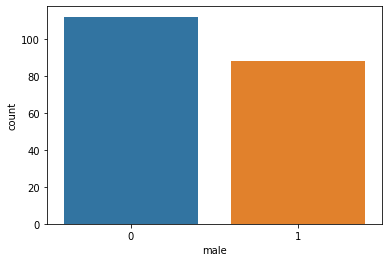

****************************
****************************
****************************
distribution for  TenYearCHD
0    166
1     34
Name: TenYearCHD, dtype: int64


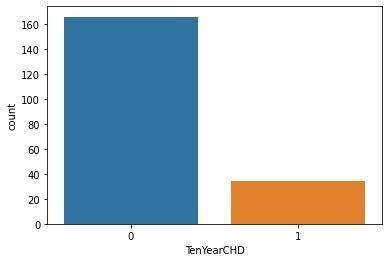

****************************
****************************
****************************


In [ ]:
# print(df2["male"].value_counts())
for col in discrete_vars:
  print("distribution for ",col)
  info=df2[col].value_counts()
  print(info)
  sns.countplot(x=df2[col])
  plt.show()
  print("****************************")
  print("****************************")
  print("****************************")


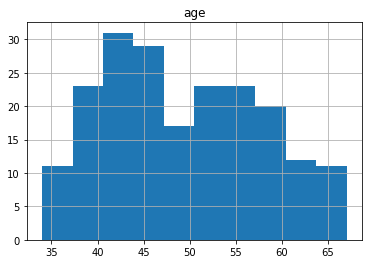

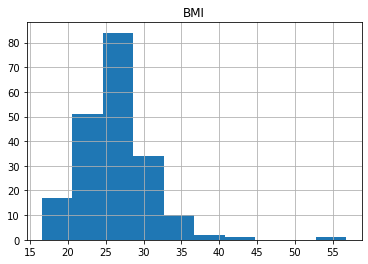

In [ ]:
for col in continius_vars:
  df2[col].hist()
  plt.title(str(col))
  plt.show()
  print()

 **שאלה 3ב**

distribution for  age
0


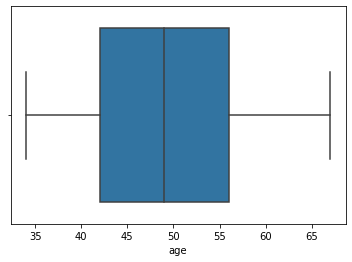

****************************
****************************
****************************
distribution for  BMI
0


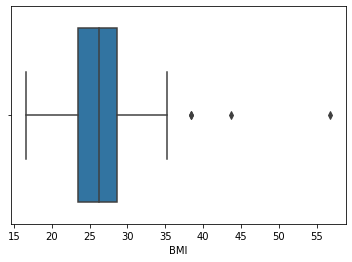

****************************
****************************
****************************


In [ ]:
for col in continius_vars:
  print("distribution for ",col)
  print(df2[col].isna().sum())
  sns.boxplot(x=df2[col])
  plt.show()
  print("****************************")
  print("****************************")
  print("****************************")

In [ ]:
df2 = df2[["age", "male", "BMI", "TenYearCHD"]]
df2 = df2.dropna()


אם נתבונן על הנתונים ועל היצוג הגרפי שלהם נוכל לראות שיש ערך לא מוגדר אחד. התפלגות יחסית סימטרית בין גברים לנשים אך מיעוט של חולי לב במדגם. בגילאים אפשר לראות התפלגות יחסית יציבה בלי סטיות גדולות לעומת הבי אמ אי שאפשר לראות שיש בו כמה ערכים חריגים.

**שאלה 4**

age


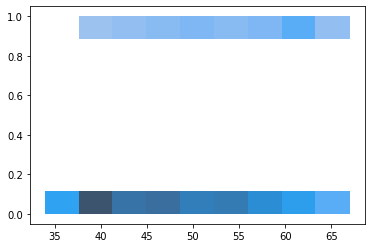

BMI


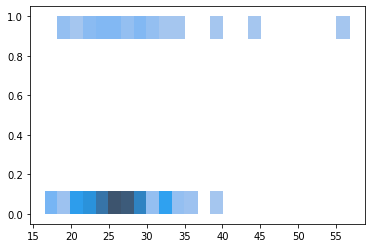

In [ ]:
# Y = df2.loc[df2["TenYearCHD"] != 0]
Y = df2["TenYearCHD"]
X = df2[["age","BMI"]]
for column in X:
  print(column)
  sns.histplot(x= X[column].to_list() , y=Y.to_list())
  plt.show()

המידע מהגרף מוטה, כי נראה שבגיל 25-30 כמות גדולה מאוד של האנשים בריאים, אך משתנה הגיל אינו מתפלג אחיד ולכן אני רואים את הכמות האבסולוטית שהיא גדולה וזו לא עדות לקבוצה שבאופן יחסי בריאה יותר.

מה שכן ניתן לראות זה שבגיל זה - רוב האנשים אינם חולים, אך זה לא מידע ׳מעניין׳...


**שאלה 5**

In [ ]:
from sklearn.linear_model import LogisticRegression
y = df2["TenYearCHD"]
x = df2[["age","BMI", "male"]]

In [ ]:
x.isna().sum()

age     0
BMI     0
male    0
dtype: int64

In [ ]:
model2 = LogisticRegression(random_state=0).fit(x, y)
beta = np.concatenate((model2.intercept_,model2.coef_), axis=None)
print(model2.intercept_, model2.coef_)
print(beta)

[-8.09868096] [[0.08292663 0.07161589 0.67739228]]
[-8.09868096  0.08292663  0.07161589  0.67739228]


enlarge x_i in one unit will affect the Odds ratio to be enlarge in exp(beta_i)

**שאלה 5**

In [ ]:
from numpy.core.fromnumeric import var
def pie(beta, xi):
  m = np.exp(np.inner(beta, xi))
  n = 1 + m
  return m/n
  
n = df2.shape[0]
v = np.zeros((n, n))
x = df2.drop(["TenYearCHD"], axis=1)
ones = np.ones((n,1))
x = x.values
x = np.concatenate((ones, x), axis=1)

for i in range(n):
  pi = pie(beta, x[i])
  v[i][i] = pi * (1 - pi)
covariance_of_b = np.linalg.pinv(np.transpose(x) @ v @ x)
variance_of_b = []
for i in range(covariance_of_b.shape[0]):
  variance_of_b.append(covariance_of_b[i][i])
ci_for_b = []
for i in range(len(variance_of_b)):
  ci_for_b.append((beta[i] - 1.96 * np.sqrt(variance_of_b [i]), beta[i] + 1.96 * np.sqrt(variance_of_b [i])))
ci_for_b


[(-300.79672588633764, 284.5993639597692),
 (-4.014964837287655, 4.180818105780391),
 (-120.39532894464928, 120.53856071596728),
 (-12.094581534762565, 13.449366094872097)]

In [ ]:
y = df_full["TenYearCHD"]
x = df_full[["age","BMI", "male"]]
model2_full = LogisticRegression(random_state=0).fit(x, y)
beta_full = np.concatenate((model2_full.intercept_,model2_full.coef_), axis=None)
beta_full

array([-6.6469383 ,  0.0744235 ,  0.03113944,  0.57336613])

In [ ]:
for i in range(len(beta_full)):
    print("for b" + str(i))
    print(is_between(beta_full[i], ci_for_b[i],"value"))
    print()

for b0
------the value is between the confidence interval------

for b1
------the value is between the confidence interval------

for b2
------the value is between the confidence interval------

for b3
------the value is between the confidence interval------



**שאלה 6**

In [ ]:
y = df2["TenYearCHD"]
x = df2[["age","BMI", "male"]]

chd = np.array(df2["TenYearCHD"])
real_y = chd
n = len(chd)
age = np.array(df2["age"])
bmi = np.array(df2["BMI"])
male = np.array(df2["male"])

age_bmi = np.multiply(age, bmi)
bmi_male = np.multiply(bmi, male)
male_age = np.multiply(male, age)


#create feature matrix X 
x_interaction = [[age[i], bmi[i], male[i], age_bmi[i], bmi_male[i], male_age[i]] for i in range(len(chd))]
# ones_np = np.ones(n)
# ones_np = np.reshape(ones_np, (n,1))
# matrix_x_interaction = np.concatenate((ones_np,x_interaction),axis=1)


In [ ]:
model_interaction = LogisticRegression(random_state=0).fit(x_interaction, y)
beta_inter = np.concatenate((model_interaction.intercept_,model_interaction.coef_), axis=None)
print(beta_inter)

[-0.01248787 -0.06195677 -0.18799194 -0.00036806  0.00458049 -0.00036132
  0.01503083]


In [ ]:
def predict_probability(x, beta):
  beta = beta.tolist()
  val = beta[0]
  for i in range(len(x)):
    val += beta[i+1]*x[i]
  e_pow = np.exp(val)
  return e_pow/(1+e_pow)

In [ ]:
#regular model  
x_regular = [[age[i], bmi[i], male[i]] for i in range(len(chd))]
pi_regular = []
likely_regular = 1
for i in range(len(x_interaction)):
  pi_i = predict_probability(x_regular[i],beta)
  pi_regular.append(pi_i)
  likely_regular *= (pi_i**real_y[i])*(1-pi_i)**real_y[i]



In [ ]:
#interaction
pi_interaction = []
likely_interaction = 1
for i in range(len(x_interaction)):
  pi_i = predict_probability(x_interaction[i],beta_inter)
  pi_interaction.append(pi_i)
  likely_interaction *= (pi_i**real_y[i])*(1-pi_i)**real_y[i]

מבחן יחס נראות

In [ ]:
print(likely_regular)
print(likely_interaction)
print(f'The regular model is better than the interactiom')

9.95982430677447e-28
2.806662215762625e-28
The regular model is better than the interactiom


מבחן BIC

In [ ]:
BIC = likely_regular - 0.5 * 3 * np.log(n)
BIC_interaction = likely_interaction - 0.5 * 6 * np.log(n)

print("BIC of the original model is : " + str(BIC))
print("BIC of the extended model is : " + str(BIC_interaction))

if BIC_interaction > BIC:
    print("Interaction model is better in terms of BIC.")
else:
    print("Interaction model is not significantly better in terms of BIC. Remain with H0 - the regular model")

BIC of the original model is : -7.947476049822054
BIC of the extended model is : -15.894952099644108
Interaction model is not significantly better in terms of BIC. Remain with H0 - the regular model


**שאלה 7**

In [ ]:
import itertools
df = df_full.dropna()
feature_list = df.columns[:-1] #all except TenYearChd
temp_all_f = list(itertools.product(*[feature_list, feature_list]))
interaction = []
for i in temp_all_f:
    if i[0] != i[1] and (i[1], i[0]) not in interaction:
        interaction.append(i)

In [ ]:
extendedData = df.copy()
for i in interaction:
    extendedData[i[0] + ":" + i[1]] = extendedData[i[0]] * extendedData[i[1]]
n = len(extendedData)


In [ ]:
# from scipy.stats import chi2

labels = df['TenYearCHD']
X_extended = extendedData.to_numpy()
X0 = np.ones((n, 1))
X_extended = np.hstack((X0, X_extended))

def sig(x):
 return 1/(1 + np.exp(-x))

In [ ]:
# Forward
from sklearn import linear_model


def AIC(l, S, n):
    return l-S


def Forward(measure_func):
    possible_features = extendedData.columns
    wanted_features = []
    max_measure = float('-inf')

    for i in range(len(possible_features)):
        feature_to_add = possible_features[i]
        wanted_features_temp = wanted_features.copy()
        wanted_features_temp.append(feature_to_add)
        temp_data = extendedData[wanted_features_temp]

        reg = linear_model.LogisticRegression()
        reg.fit(temp_data.values, labels.values)

        temp_X = temp_data.to_numpy()
        temp_X0 = np.ones((n, 1))
        temp_X = np.hstack((temp_X0, temp_X))
        temp_Beta_0 = reg.intercept_
        temp_Beta = reg.coef_
        temp_Beta = np.hstack(([temp_Beta_0], temp_Beta))

        temp_likeliHood = 0

        for i in range(n):
            w = np.dot(temp_Beta,temp_X[i])
            pi = sig(w)
            temp_likeliHood += labels.values[i]*np.log(pi/(1-pi)) + np.log(1-pi)

        temp_measure = measure_func(temp_likeliHood, len(wanted_features_temp), n)

        if temp_measure >= max_measure:
            max_measure = temp_measure
            wanted_features = wanted_features_temp.copy()
  
    return wanted_features    

Forward(AIC)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


['male',
 'age',
 'education',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'diaBP',
 'TenYearCHD',
 'male:education',
 'male:prevalentStroke']

In [ ]:
#Backward

def Backward(measure_func):
    
    possible_features = list(extendedData.columns)
    wanted_features = possible_features.copy()
    likeliHood_extended = -15
    max_measure = measure_func(likeliHood_extended, len(possible_features), n)

    for i in range(len(possible_features)):
        feature_to_remove = possible_features[i]
        wanted_features_temp = wanted_features.copy()
        wanted_features_temp.remove(feature_to_remove)
        temp_data = extendedData[wanted_features_temp]

        reg = linear_model.LogisticRegression()
        reg.fit(temp_data.values, labels.values)

        temp_X = temp_data.to_numpy()
        temp_X0 = np.ones((n, 1))
        temp_X = np.hstack((temp_X0, temp_X))
        temp_Beta_0 = reg.intercept_
        temp_Beta = reg.coef_
        temp_Beta = np.hstack(([temp_Beta_0], temp_Beta))

        temp_likeliHood = 0

        for i in range(n):
            w = np.dot(temp_Beta,temp_X[i])
            pi = sig(w)
            temp_likeliHood += labels.values[i]*np.log(pi/(1-pi)) + np.log(1-pi)

        temp_measure = measure_func(temp_likeliHood, len(wanted_features_temp), n)

        if temp_measure >= max_measure:
            max_measure = temp_measure
            wanted_features = wanted_features_temp.copy()

    return wanted_features

Backward(AIC)

In [ ]:
def BIC(log, S, n):
    return log-0.5*S*np.log(n)

In [ ]:
print("Forward and BIC has score of: ",Forward(BIC))
print("Backward and BIC has score of: ",Backward(BIC))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Forward and BIC has score of:  ['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentHyp', 'diabetes', 'sysBP', 'TenYearCHD']


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Backward and BIC has score of:  ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'male:age', 'male:education', 'male:currentSmoker', 'male:cigsPerDay', 'male:BPMeds', 'male:prevalentStroke', 'male:prevalentHyp', 'male:diabetes', 'male:totChol', 'male:sysBP', 'male:diaBP', 'male:BMI', 'male:heartRate', 'male:glucose', 'age:education', 'age:currentSmoker', 'age:cigsPerDay', 'age:BPMeds', 'age:prevalentStroke', 'age:prevalentHyp', 'age:diabetes', 'age:totChol', 'age:sysBP', 'age:diaBP', 'age:BMI', 'age:heartRate', 'age:glucose', 'education:currentSmoker', 'education:cigsPerDay', 'education:BPMeds', 'education:prevalentStroke', 'education:prevalentHyp', 'education:diabetes', 'education:totChol', 'education:sysBP', 'education:diaBP', 'education:BMI', 'education:heartRate', 'education:glucose', 'currentSmoker:cigsPerDay', 'currentSmoker:BPMeds', 'curre

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


יש הבדל בתוצאות שני המודלים
